<h1><center><font color=purple> Linear Regression analysis with python </font></center></h1>
    
*To practise what I have learned about linear regression, I am going to use linear regression to analyze the relationship between the advertising spend on three media platforms and the sales. And to create linear regression model to predict future sales. The dataset I am going to use is "Advertising_data_Linear_Reg.csv " and this notebook includes:*
    
   * __Simple linear regression (with Statsmodel)__
   * __Multible linear regression (with Scikit-Learn)__

*Each regression will follow the line: __Build - Test - Evaluate(Quantify and Visualize)__*

                                                          __By Sophie on Jan, 26 2021

### <font color=purple>Step1: explore data</font>
*Before build linear regression model, I am going to brieftly detect the data I got and visualize it to see how the association between variables.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Read/open the file
df = pd.read_csv("Advertising_data_Linear_Reg.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Check row, column, missing value, datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


*__there is total 200 entries, all numerical and no missing values.__*

In [4]:
# Overview the statistical number in each variable
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


* __TV spend value between 0.70 to 296.40 with mean 147.04 and median 149.75;__

* __Radio spend value between 0.00 to 49.60 with mean 30.55 and median 22.90;__

* __Newspaper spend value between 0.30 to 114.00 with mean 30.55 and median 25.75;__

* __Sales value between 1.60 to 27.00 with mean 15.13 and median 16.00.__

*__Seems except Newspaper right skewed, other variable normal distribute.__*

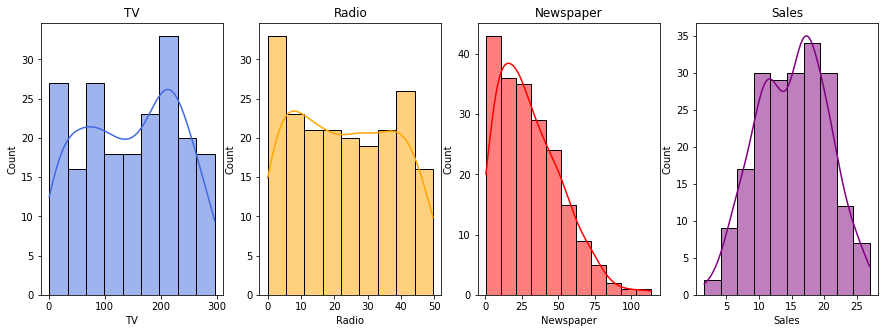

In [5]:
#Visualize each variable's value distribution

fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.histplot(ax=axes[0], x=df['TV'], kde=True, color="royalblue")
axes[0].set_title('TV')

sns.histplot(ax=axes[1], x=df['Radio'], kde=True, color="orange")
axes[1].set_title('Radio')

sns.histplot(ax=axes[2], x=df['Newspaper'], kde=True, color="red")
axes[2].set_title('Newspaper')

sns.histplot(ax=axes[3], x=df['Sales'], kde=True, color="purple")
axes[3].set_title('Sales')

plt.show()

In [6]:
# Check correlation between sales and other variables
df.corr()["Sales"].sort_values()

Newspaper    0.157960
Radio        0.349631
TV           0.901208
Sales        1.000000
Name: Sales, dtype: float64

*__Looks all three variables have positive relation with sales, specially TV with correlation 0.90, strong, positve association with sales.__*

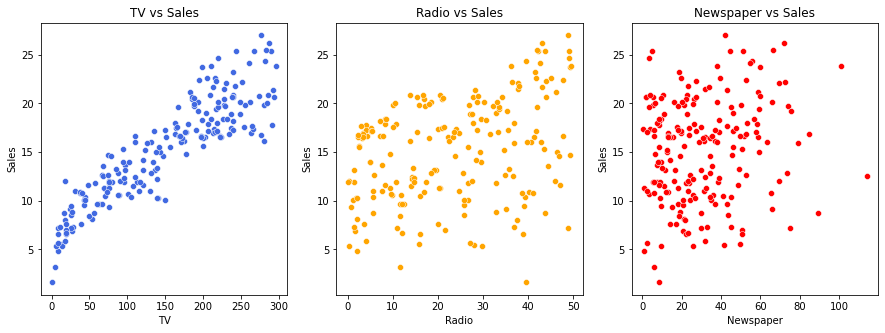

In [7]:
# Visualize the association between three channels and sales.

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x=df['TV'], y=df['Sales'], color="royalblue")
axes[0].set_title('TV vs Sales')

sns.scatterplot(ax=axes[1], x=df['Radio'], y=df['Sales'], color="orange")
axes[1].set_title('Radio vs Sales')

sns.scatterplot(ax=axes[2], x=df['Newspaper'], y=df['Sales'], color="red")
axes[2].set_title('Newspaper vs Sales')

plt.show()

*Summary:*

- __By looking at the data and scatterplots above, I can see there is positive association between advertising spend on media and sales, especially between spend on TV and sales.__

- __So next, I am going to build linear regression model which can be used to predict future sales based on advertising spend.__

- __Once again, in order to get good practise, first I am going to use one variable "TV" to build simple linear regression. Then I will build multiple linear regression.__

### <font color=purple> Step 2: Build models -> Test models -> Visualize predictions</font>

*__Frist I am going to use Statismodel to create a simple linear regression: Model_a, then use Scikit-Learn to create a multiple linear regression: Model_b.__*

#### <font color=purple> Model A: Simple Linear Regression(SLR) by using statismodel</font>

* __Create Modle_a__

In [8]:
# Import ols from Statsmodel in order to create module
from statsmodels.formula.api import ols 

In [9]:
# Create the model object and fit the model
Model_a = ols("Sales ~ TV", data=df).fit() 

* __Test Modle_a__

In [10]:
# Create the explanatory_data then use model to predict with explanatory_data
explanatory_data = pd.DataFrame({'TV': np.arange(0, 300, 25)})
Sales = Model_a.predict(explanatory_data) 

In [11]:
# Create prediction_data
prediction_data = explanatory_data.assign(Sales = Sales)
print(prediction_data)

     TV      Sales
0     0   6.974821
1    25   8.361441
2    50   9.748060
3    75  11.134679
4   100  12.521299
5   125  13.907918
6   150  15.294537
7   175  16.681156
8   200  18.067776
9   225  19.454395
10  250  20.841014
11  275  22.227633


* __Visualize Model_a's predictions__

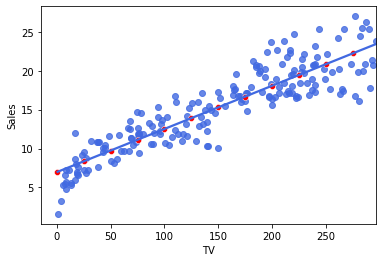

In [12]:
fig = plt.figure()

sns.regplot(x="TV", y="Sales", data=df, ci=None, color="royalblue")

sns.scatterplot(x="TV", y="Sales", data=prediction_data, color="red")

plt.show()

*__By looking plot above, the predictions fall in the reg line, so the model seems predict well__*

#### <font color=purple> Model B: Multible Linear Regression(MLR) by using Scikit-Learn</font>

* __Build Model_b__

In [13]:
# split data to X features and Y labels
X = df.drop('Sales', axis = 1)
y = df['Sales']

In [14]:
# import packages from sklearn in order to build model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# Randomly split data to train set and test set on ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [16]:
# Create the model and fit to train dataset
Model_b = LinearRegression()
Model_b.fit(X_train, y_train)

LinearRegression()

* __Test Model_b__

In [17]:
test_predictions = Model_b.predict(X_test)

* __Visualize Model_b's predictions__

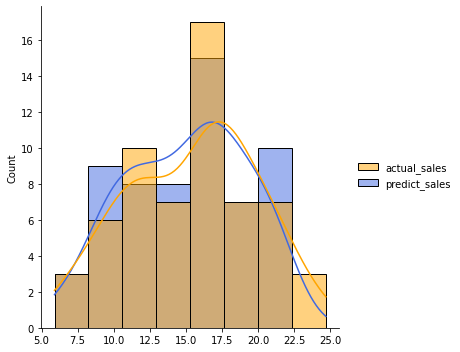

In [18]:
actual_vs_predict = pd.DataFrame({"actual_sales":y_test,
                                 "predict_sales":test_predictions})
sns.displot(data=actual_vs_predict, kde=True, palette=["orange", "royalblue"])
plt.show()

*__by looking at the plot above, the actual sales in test set and the prediction based test feature are quiet close to each other. So the model seems predict well.__* 

### <font color=purple> Step 3: Evaluate regression models </font>
*Now we have built SLR Modle_a and MLR Model_b and gotten them tested. Both can work, but question is how good or how fit they are and which one is better? In following part, I am going to evaluate these two models. The evaluation method will be used:* 
* __Quantify model fit:__
  * __R-squared__
  * __Residual Standard Error(RSE) or Root Mean Square Error(RMSE)__
* __Visualiz model fit:__
  * __Residuals vs fitted__
  * __Residual distribution plot__

#### <font color=purple> Evaluate Model_a:</font>

In [19]:
# Get R-squared
print("R_squared of the Model_a(SLR) is: {}".format(Model_a.rsquared))

R_squared of the Model_a(SLR) is: 0.8121757029987414


__R_squared(Coefficient of determination) 0.812 means our model can explain 81.2% data.__

In [20]:
# Calculate Residual standard error(RSE)
print("RSE of the Model_a(SLR) is: {}".format(np.sqrt(Model_a.mse_resid)))

RSE of the Model_a(SLR) is: 2.2957457136214456


__RSE(Residual Standard Error) 2.296 means the difference between predicted sales and observed sales is typically about 2.296 sales' unit.__

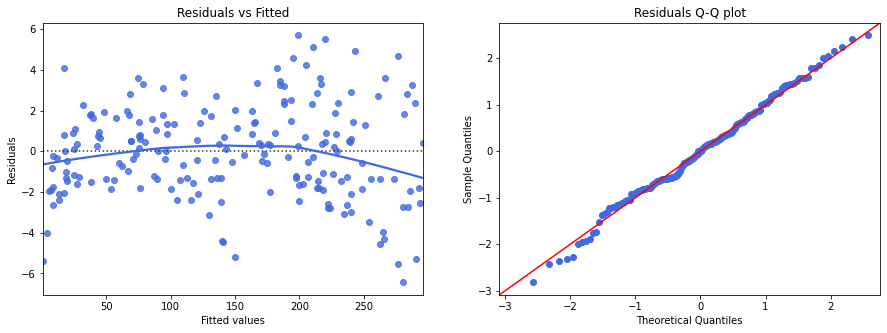

In [21]:
# Visualize residual properties of a good fit.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.residplot(ax=axes[0], x="TV", y="Sales", data=df, lowess=True, color="royalblue")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted")

from statsmodels.api import qqplot
qqplot(ax=axes[1], data=Model_a.resid, fit=True, line="45", color="royalblue")
axes[1].set_title("Residuals Q-Q plot")

plt.show()

*If a perfect fit, residuals will be normally distributed and the mean of the residuals should be zero.*

* __by looking residuals plot above on the left, I can see the residuals about evenly along the zero line, not so far away from zero and no strange curve.__ 

* __by looking Q_Q plot, the residuals distrubution is tightly along the red normal distribution line, so the model's residual normally distributed__

__Summary: Model_a is reasonable good model__

#### <font color=purple> Evaluate Model_b:</font>

In [22]:
# Import metrics in order to quantify how good the model is.
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [23]:
# Calculate R2 - coefficient of determination
r2_score(y_test, test_predictions)

0.8655979373420272

###### __R_squared(Coefficient of determination) 0.866 means our model can explain 86.6% data.__

In [24]:
# Caculate Mean of Sales
df['Sales'].mean()

15.130500000000005

In [25]:
# Calculate mean absolute error
mean_absolute_error(y_test, test_predictions)

1.227818356658941

__MAE(Mean absolute error) 1.23 means the model have error less 10%. In case there is any outlier, we need to check RMSE(Root mean square error).__

In [26]:
# Calculate RMSE(root mean squared error)
np.sqrt(mean_squared_error(y_test, test_predictions))

1.623599877533891

__I can see RMSE(Root Mean Squared Error) 1.624, which not much different from mean absolute error, so there is no value so far away from the mean, or there is no outliers.__

In [27]:
# Calculate residuals.
Model_b_residuals = y_test - test_predictions

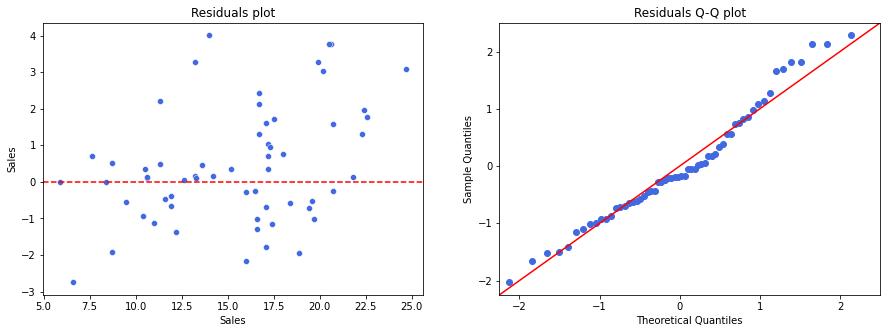

In [28]:
# Visualize residual properties of a good fit.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x=y_test, y=Model_b_residuals, color="royalblue")
axes[0].axhline(y=0, color="red", ls="--")
axes[0].set_title("Residuals plot")

qqplot(ax=axes[1], data=Model_b_residuals, fit=True, line="45", color="royalblue");
axes[1].set_title("Residuals Q-Q plot")

plt.show()

*if a perfect fit, residuals will be normally distributed and the mean of the residuals should be zero.*

* __by looking residuals plot above on the left, I can see the residuals about evenly along the zero line, not so far away from zero and no strange curve.__ 

* __by looking Q_Q plot, the residuals distrubution is tightly along the red normal distribution line, so the model's residual normally distributed__

*__Summary: Model_b is reasonable good model__*

### <font color=purple> Conclusion </font>
*__Compare above two models, Model_b has better fit than model_a. Let's assume we all are satistified the model for the real business in future. So I am going to load and save the model for future use.__* 

In [29]:
# Create final multile linear regression model
final_model = LinearRegression()

In [30]:
# fit model with whole data set
final_model.fit(X, y)

LinearRegression()

In [31]:
# Check the final model's coefficient
final_model.coef_

array([0.05444578, 0.10700123, 0.00033566])

*__Coefficient for TV spend: 0.054, coefficient for Radio spend: 0.107, coefficient for Newspaper: 0.0003. These numbers means how much effect to sale when we spend on those three channels. We can see in the model Newspaper channel almost effect nothing on sales, that means the model does not consider newspaper spend.__* 

*__If quantitatively speaking, for instance TV coefficient 0.054, if hold other two features fixed, if increase 1 unit spend on TV, sales will increase 0.054 unit.__*

In [32]:
# Import package for modle save and load
from joblib import dump,load

In [33]:
# Save the model
dump(final_model, "sales_vs_adver.joblib")

['sales_vs_adver.joblib']

In [34]:
# Load model to use
loaded_model = load("sales_vs_adver.joblib")

In [35]:
#if run a advertising campaign, spend 100 on TV, 22 on Radio, 15 on Newspaper
campaign = [[100, 22, 15]]

In [36]:
# Pridect how much sales will get from that campaign
loaded_model.predict(campaign)

array([12.428764])

*__Spend 100 on TV, 22 on Radio, 15 on Newspaper, will get about sales 12.43 units.__*

### <font color=purple>End</font>